In [2]:
#Q1.

import pandas as pd

df = pd.read_csv("/content/p2p-Gnutella08.txt", header=0, delimiter="\t")
df.head()

,FromNodeId,ToNodeId
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [3]:
import matplotlib.pyplot as plt
from collections import defaultdict

In [4]:
#adjacency matrix
class graph:
    def __init__(self,n):
        self.nodes = n
        self.adjMat = [[0 for j in range(self.nodes)]for i in range(self.nodes)]
        
    def addEdge(self,vertex1,vertex2):
        self.adjMat[vertex1][vertex2] = 1
        
    def printMat(self):
        print(self.adjMat)
    
    def clusterCoeff(self):
        result = [0]*len(self.adjMat)

        for i in range(len(self.adjMat)):
            neighbours = []
            for j in range(len(self.adjMat)):
                if self.adjMat[i][j] == 1 :
                    neighbours.append(j)

            n_neighbours = len(neighbours)
            n_links = 0

            if n_neighbours > 1:
                for vertex1 in neighbours:
                    for vertex2 in neighbours:
                        if(self.adjMat[vertex1][vertex2] == 1 and self.adjMat[vertex2][vertex1] == 1):
                            n_links += 1

                n_links /= 2  #because it is calculated twice

                result[i] = 2*n_links/(n_neighbours*(n_neighbours-1))

            else:
                result[i] = 0

        plt.hist(result)
        plt.xlabel('Local Clustering Coefficient(Between 0 and 1)')
        plt.xlim([0,1])
        plt.ylabel('Frequency')
        plt.show()
        
#adjacency list
class edgeList:
    def __init__(self,n):
        self.nodes = n
        self.list = {node : set() for node in range(self.nodes)}
        self.out = []
        self.inL = [0]*self.nodes
        self.avgIN = 0
        self.avgOUT = 0
        self.x1 = []
        self.y1 = []
        self.x2 = []
        self.y2 = []
        
    def addEdge(self,vertex1,vertex2):
        self.list[vertex1].add(vertex2)
        
    def printList(self):
        for key in self.list.keys():
            print("node ", key, "-->", self.list[key])
        
    def calcDegree(self):
        for key in self.list.keys():
            self.out.append(len(self.list[key]))
            
            for i in self.list[key]:
                self.inL[i] += 1
        
        self.avgIN = sum(self.inL)/len(self.inL)
        self.avgOUT = sum(self.out)/len(self.out)
        
        print("average In-Degree --> " + str(self.avgIN))
        print("average Out Degree --> " + str(self.avgOUT))
        print("Node with Max In-Degree ---> " + str(self.inL.index(max(self.inL))))
        print("Node with Max out-Degree ---> " + str(self.inL.index(max(self.inL))))
        
    def calcFreq(self):
        freq1 = defaultdict(int)
        freq2 = defaultdict(int)
        for i in self.inL:
            freq1[i] += 1
        for i in self.out:
            freq2[i] += 1
        
        for v in list(freq1.values()):
            self.y1.append(v)
            
        for k in list(freq1.keys()):
            self.x1.append(k)
        
        for v in list(freq2.values()):
            self.y2.append(v)
            
        for k in list(freq2.keys()):
            self.x2.append(k)
        
        
    def plotDegreeDist(self):
        fig = plt.figure(figsize=(14,10))
            
        plt.subplot(211)
        plt.bar(self.x1,self.y1)
        plt.xlabel('degrees')
        plt.ylabel('frequency')
        #plt.xlim([0,16])
        plt.xticks(self.x1,self.x1)
        
        plt.subplot(212)
        plt.bar(self.x2,self.y2)
        plt.xlabel('degrees')
        plt.ylabel('frequency')
        #plt.xlim([0,16])
        plt.xticks(self.x2,self.x2)
        
        plt.show()

In [5]:
network = graph(6301)

for index, row in df.iterrows():
    network.addEdge(row['FromNodeId'], row['ToNodeId'])

print("number of nodes are ---> " + str(network.nodes))
print("number of edges are ---> "+ str(len(df)))

eL = edgeList(6301)

for index, row in df.iterrows():
    eL.addEdge(row['FromNodeId'], row['ToNodeId'])


eL.calcDegree()

den = len(df)/(network.nodes*(network.nodes-1))
print("density of network is ---> " + str(den))

number of nodes are ---> 6301
number of edges are ---> 20777
average In-Degree --> 3.2974131090303125
average Out Degree --> 3.2974131090303125
Node with Max In-Degree ---> 266
Node with Max out-Degree ---> 266
density of network is ---> 0.0005233989061952878


In [8]:
eL.printList()

Streaming output truncated to the last 5000 lines.
node  1301 --> {1345, 866, 1347, 1346, 1348, 1349, 1350, 1351, 1305}
node  1302 --> set()
node  1303 --> set()
node  1304 --> set()
node  1305 --> {67, 1669, 427, 3150, 3151, 176, 3152, 339, 1749, 124}
node  1306 --> set()
node  1307 --> {1312, 1313, 1314, 1315, 1316, 240, 1308, 1309, 1310, 1311}
node  1308 --> {2661, 2922, 3181, 3182, 3183}
node  1309 --> set()
node  1310 --> {128, 1317, 9, 427, 367, 369, 179, 122, 123, 124}
node  1311 --> set()
node  1312 --> set()
node  1313 --> set()
node  1314 --> set()
node  1315 --> set()
node  1316 --> set()
node  1317 --> {3168, 3109, 1036, 3166, 2362, 3163, 3164, 3165, 1534, 3167}
node  1318 --> {3161, 1955, 1541, 2758, 756, 3159, 1272, 1273, 3162, 3160}
node  1319 --> {390, 423, 264, 559, 147, 248, 121, 667, 252, 1245}
node  1320 --> set()
node  1321 --> set()
node  1322 --> set()
node  1323 --> {1728, 3200, 3201, 3079, 137, 557, 1039, 2646, 3199}
node  1324 --> set()
node  1325 --> {731}
no

In [ ]:
eL.calcFreq()

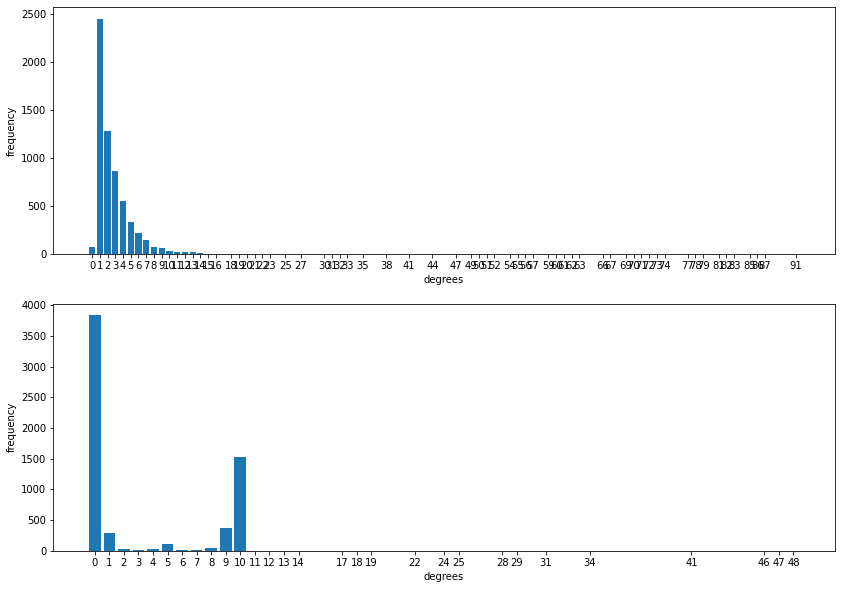

In [ ]:
eL.plotDegreeDist()

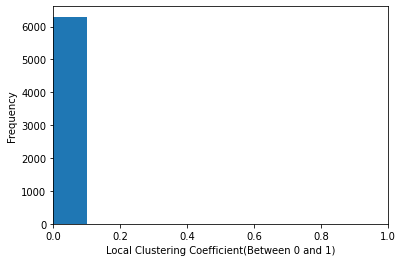

In [ ]:
network.clusterCoeff()

In [ ]:
#Q2.

import networkx as nx

G = nx.from_pandas_edgelist(df, 'FromNodeId', 'ToNodeId')

page_ranks = nx.pagerank(G)
sorted_ranks = dict(sorted(page_ranks.items(), key=lambda item: item[1], reverse = True))
print(sorted_ranks)

{6139: 0.0019551737506193602, 1890: 0.0016095024506786878, 424: 0.0014466545135060796, 1317: 0.0014141933760816008, 251: 0.0013979841992657967, 123: 0.0013759146752059636, 127: 0.0013559400630007543, 266: 0.0013243598120114045, 3: 0.0013236953984442335, 264: 0.0013205432318496876, 367: 0.0013109236500507533, 427: 0.001305402214846248, 125: 0.001288206255942024, 8: 0.0012827876920079896, 249: 0.0012826906743314277, 1675: 0.0012728545186867723, 145: 0.0012547203148301333, 124: 0.0012513462376894937, 422: 0.001248672167025403, 149: 0.0012350162390484948, 390: 0.0012068247315730433, 122: 0.0012039664077360386, 126: 0.0011987293940478778, 352: 0.0011716414984080145, 5: 0.001166505777477326, 143: 0.0011592693428145175, 5831: 0.001148595987197265, 179: 0.001143625736055234, 559: 0.0011378859979992268, 353: 0.0011287385900603257, 177: 0.0011107032724790096, 144: 0.0011095485255052655, 129: 0.001096384397371494, 247: 0.001095725822799327, 176: 0.0010938315456790716, 148: 0.0010861207699457893, 

In [ ]:
h, a = nx.hits(G)
hubs=dict(sorted(h.items(), key=lambda item: item[1], reverse = True))
authorities=dict(sorted(a.items(), key=lambda item: item[1], reverse = True))

print(hubs)

{367: 0.00705810800027954, 123: 0.006736333971554648, 145: 0.0061868127585674735, 249: 0.006069799234488739, 5: 0.0059543261747313754, 127: 0.005888964712833159, 353: 0.0057534950701790665, 427: 0.005719631673350455, 124: 0.005704902016225351, 149: 0.00566677103736714, 177: 0.0056238950642775115, 264: 0.005322768092754036, 147: 0.005285594465048048, 143: 0.0052330939538248475, 144: 0.005192730280997344, 148: 0.005034978324429909, 369: 0.004862520951586137, 174: 0.004782843506823187, 352: 0.00476705708087207, 251: 0.004750229891329805, 179: 0.0047083740721397425, 266: 0.004663643554532132, 1245: 0.004639091320338149, 176: 0.004578268554866436, 856: 0.004471557314609996, 122: 0.004441035899056374, 7: 0.004342409918482869, 126: 0.0043091428400690865, 9: 0.004308326957088478, 3: 0.004288484207873892, 1317: 0.004223212545279303, 422: 0.004130664693874319, 390: 0.004041357175051512, 146: 0.003982226813756897, 424: 0.003951422514329719, 559: 0.0038810133308835437, 8: 0.003828095491628772, 125

In [ ]:
print(authorities)

{367: 0.007058108000279543, 123: 0.006736333971554655, 145: 0.006186812758567477, 249: 0.006069799234488747, 5: 0.005954326174731376, 127: 0.0058889647128331675, 353: 0.005753495070179073, 427: 0.005719631673350458, 124: 0.005704902016225359, 149: 0.005666771037367146, 177: 0.005623895064277517, 264: 0.00532276809275404, 147: 0.00528559446504805, 143: 0.00523309395382485, 144: 0.005192730280997351, 148: 0.005034978324429911, 369: 0.004862520951586141, 174: 0.004782843506823192, 352: 0.004767057080872079, 251: 0.0047502298913298146, 179: 0.0047083740721397494, 266: 0.004663643554532137, 1245: 0.004639091320338153, 176: 0.004578268554866442, 856: 0.004471557314610001, 122: 0.004441035899056383, 7: 0.004342409918482875, 126: 0.004309142840069092, 9: 0.00430832695708848, 3: 0.0042884842078739025, 1317: 0.00422321254527931, 422: 0.004130664693874324, 390: 0.004041357175051515, 146: 0.0039822268137569, 424: 0.003951422514329727, 559: 0.0038810133308835493, 8: 0.003828095491628782, 125: 0.003

In [ ]:
def print10(dicti):
    for i in range(10):
        print("Node:{} score: {}".format(list(dicti.keys())[i],list(dicti.values())[i]))

In [ ]:
print("------ Top 10 page ranks ------")
print10(sorted_ranks)
print()

print("----- Top 10 hub scores ----")
print10(hubs)
print()

print("------ Top 10 authority scores -----")
print10(authorities)
print()

------ Top 10 page ranks ------
Node:6139 score: 0.0019551737506193602
Node:1890 score: 0.0016095024506786878
Node:424 score: 0.0014466545135060796
Node:1317 score: 0.0014141933760816008
Node:251 score: 0.0013979841992657967
Node:123 score: 0.0013759146752059636
Node:127 score: 0.0013559400630007543
Node:266 score: 0.0013243598120114045
Node:3 score: 0.0013236953984442335
Node:264 score: 0.0013205432318496876

----- Top 10 hub scores ----
Node:367 score: 0.00705810800027954
Node:123 score: 0.006736333971554648
Node:145 score: 0.0061868127585674735
Node:249 score: 0.006069799234488739
Node:5 score: 0.0059543261747313754
Node:127 score: 0.005888964712833159
Node:353 score: 0.0057534950701790665
Node:427 score: 0.005719631673350455
Node:124 score: 0.005704902016225351
Node:149 score: 0.00566677103736714

------ Top 10 authority scores -----
Node:367 score: 0.007058108000279543
Node:123 score: 0.006736333971554655
Node:145 score: 0.006186812758567477
Node:249 score: 0.006069799234488747
No